In [82]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

<b>* crawling_data/감성대화말뭉치_ver토큰최종_Training.csv</b>  
- Text: 원문  
- Label: 글의 대표적인 감정 라벨  
- text_tokenized: sentence split, 형태소(n,v,a) 분리  
- text_tokenized2: 불용어 처리

In [83]:
sa = pd.read_csv('./crawling_data/감성대화말뭉치_ver토큰최종_Training.csv', encoding='utf-8 sig') #미리 토큰화한 감성 문서 활용
del sa['Unnamed: 0']

In [84]:
sa

,Text,Label,text_tokenized,text_tokenized2
0,아내가 드디어 출산하게 되어서 정말 신이 나.,기쁨,"['아내', '드디어', '출산', '하다', '되어다', '정말', '신', '나']","['아내', '드디어', '출산', '정말', '신']"
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,"['당뇨', '합병증', '때문', '먹다', '하다', '약', '열', '가지'...","['당뇨', '합병증', '때문', '먹다', '약', '열', '가지', '넘어가..."
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,당황,"['고등학교', '올라오다', '중학교', '때', '수업', '갑자기', '어려워...","['고등학교', '올라오다', '중학교', '수업', '갑자기', '어려워지다', ..."
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,기쁨,"['재', '취업', '돼다', '받다', '되다', '첫', '월급', '온', ...","['취업', '받다', '첫', '월급', '가족', '외식', '예정', '행복하다']"
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기쁨,"['빚', '드디어', '다', '갚다', '되어다', '이제야', '안도', '감...","['빚', '드디어', '갚다', '이제야', '안도', '감', '들다']"
...,...,...,...,...
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,불안,"['같이', '살다', '친구', '애완견', '데려오다', '대부분', '내', ...","['살다', '친구', '애완견', '데려오다', '대부분', '돌보다', '주인'..."
40875,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,기쁨,"['지난주', '건강검진', '결과', '나오다', '정상', '결과', '나오다']","['지난주', '건강검진', '결과', '나오다', '정상', '결과', '나오다']"
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,슬픔,"['엄마', '내', '꿈', '작가', '응원', '하다', '주다', '하다',...","['엄마', '꿈', '작가', '응원', '주다', '지금', '그렇다', '슬프다']"
40877,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,기쁨,"['이렇게', '좋다', '운동', '시설', '경로', '우대', '운동', '하...","['이렇게', '좋다', '운동', '시설', '경로', '우대', '운동', '차..."


### 감성문서 텍스트 추가 전처리  
* 감정_대분류:  
1 = 기쁨  
0 = 불안, 슬픔, 분노, 상처, 불안  
당황은 제거  


<참고> 네이버 쇼핑 리뷰 감성 분류하기 https://wikidocs.net/94600

In [85]:
sa['Label'].unique()

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처', '불안 ', '기쁨 '], dtype=object)

In [86]:
sa = sa[sa.Label != '당황']

In [87]:
sa['bi_sent'] = 0
sa['bi_sent'][(sa['Label'] == '기쁨')] = 1

C:\Users\eunah.lee\AppData\Local\Temp/ipykernel_23104/3765721047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['bi_sent'] = 0
C:\Users\eunah.lee\AppData\Local\Temp/ipykernel_23104/3765721047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['bi_sent'][(sa['Label'] == '기쁨')] = 1
C:\Users\eunah.lee\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [88]:
sa[(sa['bi_sent']==1)] # 6,730
sa[(sa['bi_sent']==0)] # 27,789

,Text,Label,text_tokenized,text_tokenized2,bi_sent
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,"['당뇨', '합병증', '때문', '먹다', '하다', '약', '열', '가지'...","['당뇨', '합병증', '때문', '먹다', '약', '열', '가지', '넘어가...",0
5,이제 곧 은퇴할 시기가 되었어. 내가 먼저 은퇴를 하고 육 개월 후에 남편도 은퇴를...,불안,"['이제', '곧', '은퇴', '하다', '시기', '되어다', '내', '먼저'...","['이제', '은퇴', '시기', '먼저', '은퇴', '개월', '남편', '은퇴...",0
6,사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.,슬픔,"['사다', '대다', '접다', '들다', '머리카락', '많이', '빠지다', ...","['사다', '대다', '접다', '들다', '머리카락', '많이', '빠지다', ...",0
7,이제 돈이라면 지긋지긋해.,분노,"['이제', '돈', '라면', '지긋지긋하다']","['이제', '돈', '라면', '지긋지긋하다']",0
8,친구들이 나를 괴롭혀. 부모님과 선생님께 얘기했는데도 믿어주지 않아.,분노,"['친구', '나르다', '괴롭히다', '부모님', '선생님', '얘기', '하다'...","['친구', '나르다', '괴롭히다', '부모님', '선생님', '얘기', '믿다'...",0
...,...,...,...,...,...
40872,오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...,분노,"['오늘', '식당', '서빙', '하다', '젊다', '청년', '반말', '하다...","['오늘', '식당', '서빙', '젊다', '청년', '반말', '기분', '나쁘...",0
40873,최 영감이 노인들에게 나를 이상한 사람으로 이야기해서 답답하고 억울해.,상처,"['최', '영감', '노인', '나르다', '이상하다', '사람', '이야기', ...","['최', '영감', '노인', '나르다', '이상하다', '사람', '이야기', ...",0
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,불안,"['같이', '살다', '친구', '애완견', '데려오다', '대부분', '내', ...","['살다', '친구', '애완견', '데려오다', '대부분', '돌보다', '주인'...",0
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,슬픔,"['엄마', '내', '꿈', '작가', '응원', '하다', '주다', '하다',...","['엄마', '꿈', '작가', '응원', '주다', '지금', '그렇다', '슬프다']",0


In [89]:
ssa = sa[['text_tokenized2','bi_sent']]
X = ssa['text_tokenized2']
y = ssa['bi_sent']

In [90]:
train_data, test_data = train_test_split(ssa, test_size = 0.25, shuffle=True,  random_state = 42)

In [91]:
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))
print(train_data.groupby('bi_sent').size().reset_index(name = 'count'))

훈련용 리뷰의 개수 : 25889
테스트용 리뷰의 개수 : 8630
   bi_sent  count
0        0  20853
1        1   5036


In [92]:
train_data

,text_tokenized2,bi_sent
18419,"['친구', '승진', '축하', '속이다', '쓰리다']",0
11266,"['동호회', '대회', '일등', '컨디션', '좋다']",1
6847,"['벌써', '은퇴', '걱정', '나이', '슬프다']",0
8164,"['열심히', '공부', '성적', '떨어지다', '낙담하다']",0
16021,"['내일', '검진', '결과', '나오다', '나쁘다', '나오다', '보다', ...",0
...,...,...
19948,"['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']",0
7392,"['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']",0
13345,"['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']",1
1026,"['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...",0


### 훈련데이터의 레이블 분포 확인

In [93]:
negative_words = np.hstack(train_data[train_data.bi_sent == 0]['text_tokenized2'].values)
positive_words = np.hstack(train_data[train_data.bi_sent == 1]['text_tokenized2'].values)

In [94]:
from collections import Counter

negative_word_count = Counter(negative_words)
print("부정 리뷰에서 빈도수가 높은 Top 20 단어")
print(negative_word_count.most_common(20))
print()
print("긍정 리뷰에서 빈도수가 높은 Top 20 단어")
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

부정 리뷰에서 빈도수가 높은 Top 20 단어
[("['취업']", 9), ("['슬프다']", 5), ('[]', 5), ("['요즘', '힘들다']", 4), ("['오늘', '기분', '좋다']", 4), ("['요즘', '걱정']", 4), ("['속상하다']", 4), ("['은퇴', '질환', '몸', '아프다']", 4), ("['가족', '생각', '짜증']", 4), ("['실망하다']", 4), ("['요즘', '혼란', '스럽다']", 4), ("['일만', '아니다', '원하다', '대학', '가다']", 3), ("['친구', '따돌림', '당하다', '그냥', '방관', '괴롭다', '죽다']", 3), ("['병원', '다녀오다', '남편', '감시', '속', '살', '진짜', '귀찮다']", 3), ("['요즘', '슬프다']", 3), ("['집', '남편', '옆집', '할머니', '예쁘다', '대놓고', '얘기', '상처', '받다']", 3), ("['힘들다']", 3), ("['남편', '때문', '화가']", 3), ("['어떻다', '이렇다']", 3), ("['일해', '돈', '모이다', '않다']", 3)]

긍정 리뷰에서 빈도수가 높은 Top 20 단어
[("['기분', '좋다']", 4), ("['요즘', '행복하다']", 4), ("['업무', '자다', '불평', '직원', '퇴사', '기분', '상쾌하다']", 3), ("['요즘', '기분', '좋다']", 3), ("['오늘', '경찰서', '연락', '받다', '돈', '훔치다', '간', '도둑', '잡다']", 3), ("['젊다', '어서', '건강', '식품', '꾸준하다', '챙기다', '먹다', '건강']", 3), ("['친구', '제주도', '놀다', '가다', '엄마', '흔쾌하다', '허락', '주다', '기쁘다']", 3), ("['집도', '연금', '나오다']", 3), ("['주변', '사람', '신뢰']", 3), ("[

긍정 리뷰의 평균 길이 : 42.44956314535346
부정 리뷰의 평균 길이 : 43.496427372560305


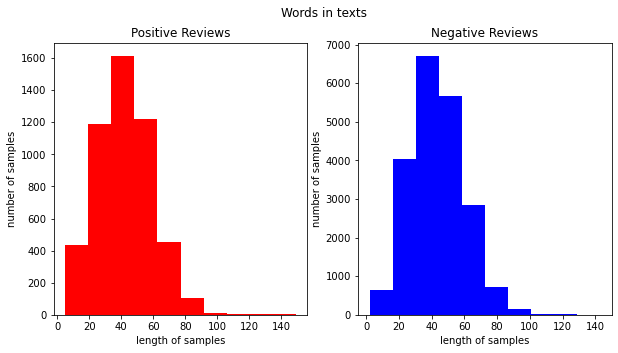

In [95]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['bi_sent']==1]['text_tokenized2'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['bi_sent']==0]['text_tokenized2'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

* <b>단어 임베딩</b>: 단어의 의미에 대한 무언가를 포착하는 단어의 조밀한 벡터 표현을 제공하는 접근 방식  
* <b>Gensim</b>: 주제 모델링에 중점을 둔 자연어 처리를 위한 라이브러리 (자연어 → 벡터)  
* <b>Word2vec</b>: 텍스트 말뭉치에서 단어 임베딩을 학습하는 하나의 알고리즘

In [96]:
df = pd.read_csv('./crawling_data/apple_thinq_processing2.csv')
a = df['content_n']

aa = []
for i in range(len(a)):
    aa.append(eval(a[i]))

In [97]:
import gensim
from gensim.models import Word2Vec, FastText

model = Word2Vec(aa, min_count=1, vector_size=300)

In [98]:
train_data = train_data.reset_index()
train_data = train_data.drop(columns = ["index"])
train_data

,text_tokenized2,bi_sent
0,"['친구', '승진', '축하', '속이다', '쓰리다']",0
1,"['동호회', '대회', '일등', '컨디션', '좋다']",1
2,"['벌써', '은퇴', '걱정', '나이', '슬프다']",0
3,"['열심히', '공부', '성적', '떨어지다', '낙담하다']",0
4,"['내일', '검진', '결과', '나오다', '나쁘다', '나오다', '보다', ...",0
...,...,...
25884,"['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']",0
25885,"['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']",0
25886,"['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']",1
25887,"['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...",0


In [99]:
a= train_data['text_tokenized2']

In [100]:
a

0                         ['친구', '승진', '축하', '속이다', '쓰리다']
1                         ['동호회', '대회', '일등', '컨디션', '좋다']
2                          ['벌써', '은퇴', '걱정', '나이', '슬프다']
3                      ['열심히', '공부', '성적', '떨어지다', '낙담하다']
4        ['내일', '검진', '결과', '나오다', '나쁘다', '나오다', '보다', ...
                               ...                        
25884       ['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']
25885       ['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']
25886      ['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']
25887    ['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...
25888    ['모임', '놀다', '늦다', '들어오다', '남편', '캐', '물어', '화가']
Name: text_tokenized2, Length: 25889, dtype: object

In [101]:
ssaa = []
for i in range(len(a)):
    ssaa.append(eval(a[i]))

In [102]:
ssa = ssaa + aa 

In [103]:
X_train = train_data['text_tokenized2']  #25,889
y_train = train_data['bi_sent']
X_test = test_data['text_tokenized2'] #8,630
y_test = test_data['bi_sent']

### 정수 인코딩  
기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩 수행해야함

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ssa) # 훈련데이터에 대해 단어 집합 만들기

In [105]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9068
등장 빈도가 1번 이하인 희귀 단어의 수: 3047
단어 집합에서 희귀 단어의 비율: 33.60167622408469
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.5451866952680877


In [106]:
# 등장 빈도가 1번 이하인 희귀 단어는 약 32%를 차지함 → 자연어 처리에서 중요하지 않을 것이므로 제외함
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6023


In [107]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [108]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(ssa)
ssa_int = tokenizer.texts_to_sequences(ssa)

In [109]:
len(ssaa) #25,889

25889

In [110]:
print(ssa_int[:3])

[[2, 204, 722, 723, 2422], [877, 1006, 822, 1999, 3], [245, 65, 16, 49, 23]]


### 패딩(padding)  
서로 다른 길이의 샘플들의 길이를 동일하게 맞춰줌

리뷰의 최대 길이 : 206
리뷰의 평균 길이 : 7.356026411012049


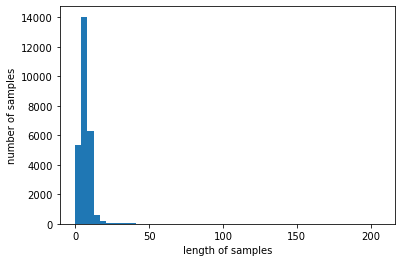

In [111]:
print('리뷰의 최대 길이 :',max(len(l) for l in ssa_int))
print('리뷰의 평균 길이 :',sum(map(len, ssa_int))/len(ssa_int))
plt.hist([len(s) for s in ssa_int], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [112]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [113]:
max_len = 25
below_threshold_len(max_len, ssa_int)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 98.95922706755698


In [114]:
# pad.sequences: 행렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
ssa_int_pad = pad_sequences(ssa_int, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

### GRU 모델링  
<b>* Sequential Model:</b>  순차적으로 layer를 더해나가는 방식  
<b>* Embedding Layer:</b> 문자 입력에 대해서 학습을 요할 때 필요한 레이어
- 첫 번째 인자: 단어 사전의 크기(=학습하고자 하는 단어의 수)  
- 두 번째 인자: output dimension  
- 세 번째 인자: 한 번에 학습하고자 하는 문장의 길이, 다음으로 플래튼 레이어가 오게 되면 반드시 명시해야함  

<b>* GRU:</b> LSTM 간소화 버전, LSTM보다 가중치가 적기 때문에 계산량이 적지만 좋은 성능을 냄  
예) model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

In [116]:
import keras
from keras.layers import Embedding, Dense, GRU, LSTM, SimpleRNN
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [137]:
embedding_dim = 64
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=200))
# model.add(LSTM(hidden_units))
model.add(GRU(hidden_units, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [117]:
# embedding_dim = 64
# hidden_units = 128

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim))
# model.add(GRU(hidden_units, return_sequences=True))
# model.add(SimpleRNN(128))
# model.add(Dense(1))

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [138]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 64)           385472    
                                                                 
 gru_3 (GRU)                 (None, 200, 128)          74496     
                                                                 
 dense_6 (Dense)             (None, 200, 1)            129       
                                                                 
Total params: 460,097
Trainable params: 460,097
Non-trainable params: 0
_________________________________________________________________


In [139]:
X_train = ssa_int_pad[:len(ssaa)] # 말뭉치만 넣어서 모델 훈련

In [140]:
len(X_train)

25889

In [141]:
# compile(): 모델을 기계가 이해할 수 있도록 컴파일함
# fit(): 모델 학습, 적합
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=es, batch_size=60, validation_split=0.2)


Epoch 1/15


ValueError: in user code:

    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 200), found shape=(None, 25)


In [131]:
#loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

270/270 [==============================] - 3s 11ms/step - loss: 0.5484 - acc: 0.7893

 테스트 정확도: 0.7893


In [132]:
X_predict = ssa_int_pad[len(ssaa):]

In [133]:
X_predict[1]

array([ 173,  512, 1021,  382,  161, 1238, 3100,  338,   54,  616, 1292,
        875, 2595,  162,  512,  254,  378,  692, 2071, 4971, 3480,  518,
       1257,  212, 1336])

In [63]:
X_predict[i].reshape(X_predict[i].shape[0], 1)

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [ 409],
       [2406],
       [ 839],
       [ 419],
       [2731],
       [ 839],
       [ 974],
       [ 419],
       [2796],
       [ 419],
       [  52],
       [1235],
       [ 839],
       [2796],
       [  22]])

In [134]:
for i in range (10):
    score = np.mean(model.predict(X_predict[i]))
#     score = np.mean(model.predict(X_predict[i].reshape(X_predict[i].shape[0], 1)))
    print(score)

ValueError: in user code:

    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\eunah.lee\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_6" (type Sequential).
    
    Input 0 of layer "gru_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)
    
    Call arguments received by layer "sequential_6" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [43]:
sent =[]
num=0
for i in range(5):
    print(num,'번째')
#     print(model.predict(X_predict))
    n = 100 - len(aa[i])
    score = model.predict(X_predict[i])
    sent.append(score)
    num=num+1
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100)) 

0 번째


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential/gru/PartitionedCall]] [Op:__inference_predict_function_20306]

In [ ]:
sent =[]
num=0
for i in range(len(X_predict)):
    print(num,'번째')
#     print(model.predict(X_predict))
    n = 100 - len(aa[i])
    score = np.mean(model.predict(X_predict[i])[n:])
    sent.append(score)
    num=num+1
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100)) 

In [ ]:
X_predict[0]

In [ ]:
import re
import kss
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = kss.split_sentences(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)

    score = float(model.predict(X_predict[0]))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))